# Book-Oracle: Exploratory Data Analysis

- Perform Exploratory Data Analysis on a merged dataset from Kaggle.
- 26.11.2023
- Janina, Oliwia, Neha, Nina

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = "{:,.2f}".format

RSEED = 42

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [3]:
df = pd.read_csv('data/kaggle_full_df.csv')
df.head()

/var/folders/kb/49ptmc2d2hbffcst0fxf43br0000gn/T/ipykernel_18534/2606110524.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/kaggle_full_df.csv')


,common_identifier,user_id,book_rating,age
count,"1,005,487.00","1,005,487.00","1,005,487.00","1,005,487.00"
mean,"62,456.39","142,071.70",2.81,27.35
std,"70,871.31","79,702.89",3.85,19.31
min,1.00,2.00,0.00,0.00
25%,"7,205.00","73,651.00",0.00,0.00
50%,"31,143.00","142,565.00",0.00,30.00
75%,"97,462.00","212,216.00",7.00,41.00
max,"271,358.00","278,854.00",10.00,100.00


## Explore Summary Statistics

In [4]:
df.info()

,book_title,book_author,year_of_publication,publisher,image_url_m,common_identifier,user_id,isbn,book_rating,age,city,country
0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,2,0195153448,0,18,stockton,usa
1,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,1,269782,0801319536,7,30,edmonton,canada
2,Pay It Forward: A Novel,Catherine Ryan Hyde,2000,Simon &amp; Schuster,http://images.amazon.com/images/P/0684862719.0...,2392,269782,0684862719,8,30,edmonton,canada
3,Watership Down,Richard Adams,1976,Avon,http://images.amazon.com/images/P/0380002930.0...,3172,269782,0140039589,10,30,edmonton,canada
4,On Writing,Stephen King,2000,Scribner,http://images.amazon.com/images/P/0684853523.0...,7188,269782,0671024256,0,30,edmonton,canada


## Basic Data Distributions

Percentage of users that come from English speaking countries: 90.13%
Percentage of ratings that are implicit (user interacted with a book, but hasn't given a rating): 63.12%


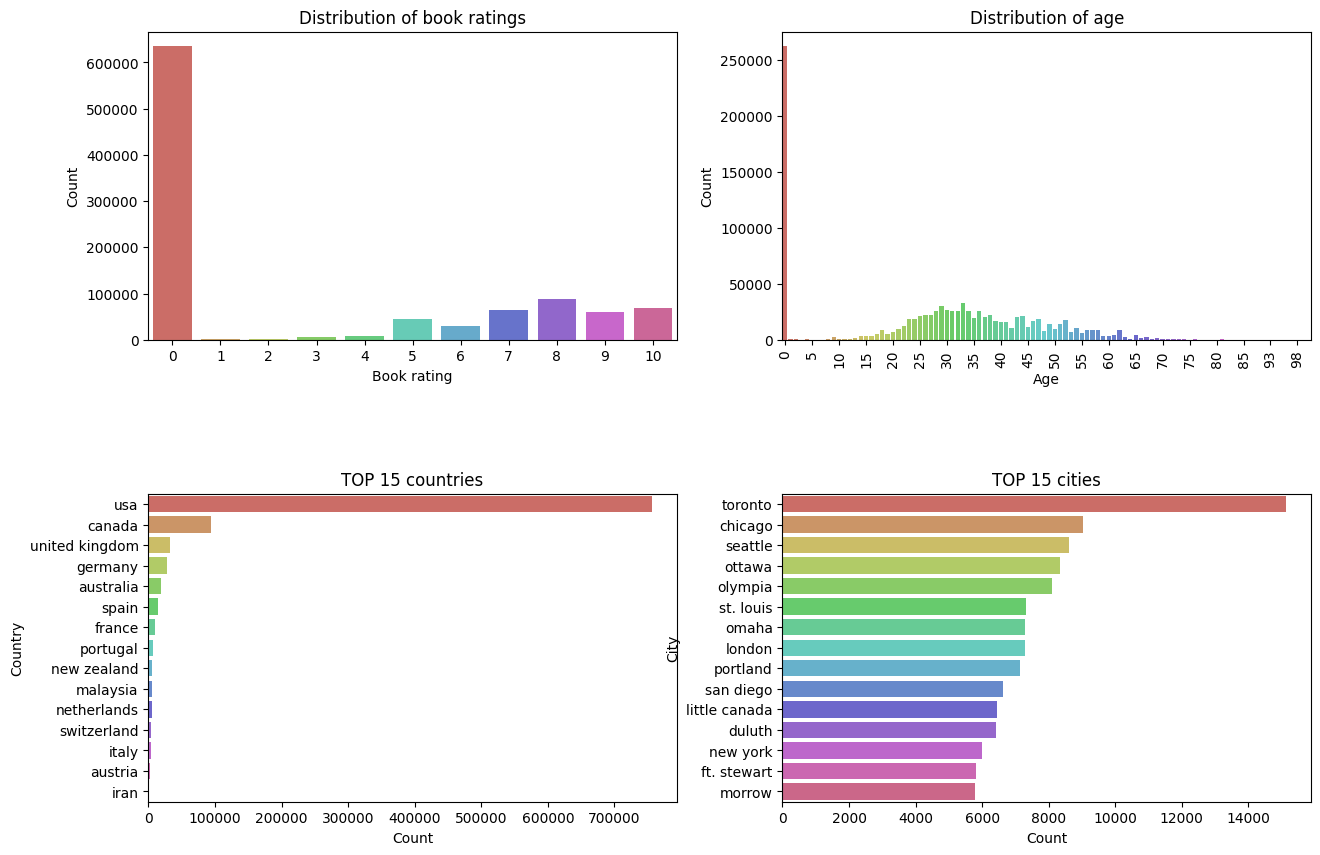

In [10]:
#Book rating distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(ax=axes[0, 0], x='book_rating', data=df, palette='hls')
axes[0, 0].set_title('Distribution of book ratings')
axes[0, 0].set_xlabel('Book rating')
axes[0, 0].set_ylabel('Count')

#User rating distribution
sns.countplot(ax=axes[0, 1], x='age', data=df, palette='hls')
axes[0, 1].set_title('Distribution of age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].xaxis.set_major_locator(plt.MultipleLocator(5))

#Top 15 countries
sns.countplot(ax=axes[1, 0], y='country', data=df, palette='hls', order=df['country'].value_counts().iloc[:15].index)
axes[1, 0].set_title('TOP 15 countries')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Country')

#Top 15 cities
sns.countplot(ax=axes[1, 1], y='city', data=df, palette='hls', order=df['city'].value_counts().iloc[:15].index)
axes[1, 1].set_title('TOP 15 cities')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('City')

plt.subplots_adjust(hspace=0.5)

#print percentage of users that come from English speaking countries

print("Percentage of users that come from English speaking countries: {:.2f}%".format(df[df['country'].isin(['usa', 'canada', 'united kingdom', 'australia', 'new zealand', 'ireland'])].shape[0]/df.shape[0]*100))

#print percentage of ratings that are implicit (rating equals 0)

print("Percentage of ratings that are implicit (user interacted with a book, but hasn't given a rating): {:.2f}%".format(df[df['book_rating']==0].shape[0]/df.shape[0]*100))

## Identify meaningful data

In [8]:
print("Percentage of users that have rated more than 30 books: {:.2f}%".format(df['user_id'].value_counts()[df['user_id'].value_counts()>30].shape[0]/df['user_id'].value_counts().shape[0]*100))
print("Percentage of books that have more than 50 ratings: {:.2f}%".format(df['common_identifier'].value_counts()[df['common_identifier'].value_counts()>50].shape[0]/df['common_identifier'].value_counts().shape[0]*100))

Percentage of users that have rated more than 30 books: 5.01%
Percentage of books that have more than 50 ratings: 0.91%


In [37]:
#Explore number of books rated per user
print("95% of users have rated {} or less books".format(df['user_id'].value_counts().quantile(0.95)))
print("90% of users have rated {} or less books".format(df['user_id'].value_counts().quantile(0.9)))
print("75% of users have rated {} or less books".format(df['user_id'].value_counts().quantile(0.75)))
print("50% of users have rated {} or less books".format(df['user_id'].value_counts().quantile(0.5)))

#print quantiles of number of book ratings per user
print("Quantiles of number of book ratings per user:")
print(df['user_id'].value_counts().quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

95% of users have rated 31.0 or less books
90% of users have rated 13.0 or less books
75% of users have rated 4.0 or less books
50% of users have rated 1.0 or less books
Quantiles of number of book ratings per user:
0.25     1.00
0.50     1.00
0.75     4.00
0.90    13.00
0.95    31.00
0.99   179.00
Name: count, dtype: float64


In [38]:
#Explore number of ratings per book

print("95% of books have {} or less ratings".format(df['common_identifier'].value_counts().quantile(0.95)))
print("90% of books have {} or less ratings".format(df['common_identifier'].value_counts().quantile(0.9)))
print("75% of books have {} or less ratings".format(df['common_identifier'].value_counts().quantile(0.75)))
print("50% of books have {} or less ratings".format(df['common_identifier'].value_counts().quantile(0.5)))

#print quantiles of number of book ratings per book
print("Quantiles of number of book ratings per book:")
print(df['common_identifier'].value_counts().quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

95% of books have 12.0 or less ratings
90% of books have 7.0 or less ratings
75% of books have 3.0 or less ratings
50% of books have 1.0 or less ratings
Quantiles of number of book ratings per book:
0.25    1.00
0.50    1.00
0.75    3.00
0.90    7.00
0.95   12.00
0.99   47.00
Name: count, dtype: float64


## Dive into books & authors

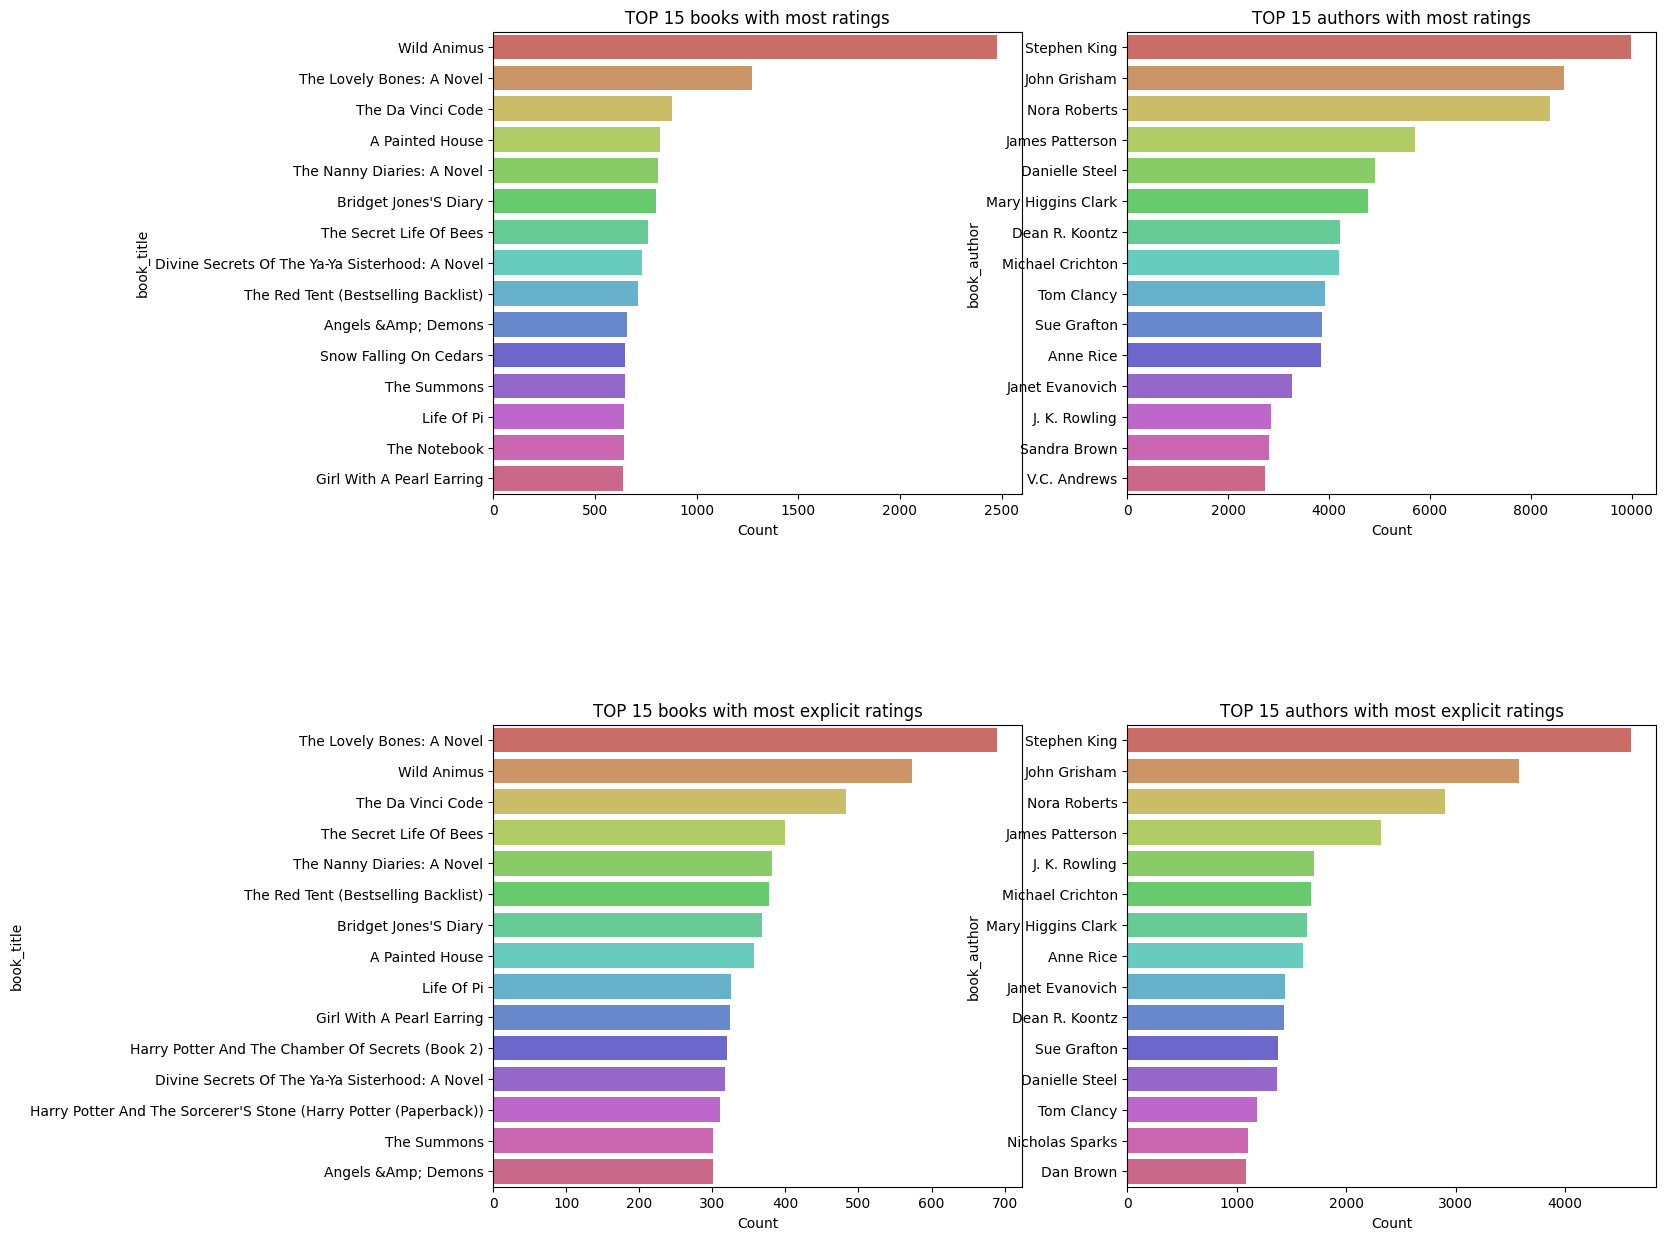

In [54]:
fig,axes = plt.subplots(2, 2, figsize=(15, 15))

#Visualise titles with most ratings
sns.countplot(ax=axes[0, 0], y='book_title', data=df, palette='hls', order=df['book_title'].value_counts().iloc[:15].index)
axes[0, 0].set_title('TOP 15 books with most ratings')
axes[0, 0].set_xlabel('Count')

#Visualise authors with most ratings
sns.countplot(ax=axes[0, 1], y='book_author', data=df, palette='hls', order=df['book_author'].value_counts().iloc[:15].index)
axes[0, 1].set_title('TOP 15 authors with most ratings')
axes[0, 1].set_xlabel('Count')

#Visualise titles with most explicit ratings
sns.countplot(ax=axes[1, 0], y='book_title', data=df[df['book_rating']!=0], palette='hls', order=df[df['book_rating']!=0]['book_title'].value_counts().iloc[:15].index)
axes[1, 0].set_title('TOP 15 books with most explicit ratings')
axes[1, 0].set_xlabel('Count')

#Visualise authors with most explicit ratings, truncate titles above 30 characters
sns.countplot(ax=axes[1, 1], y='book_author', data=df[df['book_rating']!=0], palette='hls', order=df[df['book_rating']!=0]['book_author'].value_counts().iloc[:15].index)
axes[1, 1].set_title('TOP 15 authors with most explicit ratings')
axes[1, 1].set_xlabel('Count')

plt.subplots_adjust(hspace=0.5)